In [1]:
from mp1 import *

%matplotlib inline

Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# Simple classification

In [2]:
from keras.utils.np_utils import to_categorical

X_train, Y_train = generate_dataset_classification(300, 20)
X_test, Y_test = generate_dataset_classification(300, 20)
Y_train_cat = to_categorical(Y_train)
Y_test_cat = to_categorical(Y_test)

X_train.shape, Y_train_cat.shape

((300, 5184), (300, 3))

The following network implements a simple linear classifier, mapping the 5184 dimensional input images to a 3 dimensional space. The output is normalized by the softmax activation, which allows to interpret it as the probability of the input image belonging to the $i$-th class.

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.losses import *
from keras.activations import softmax
from keras.optimizers import SGD, Adam


nb_neurons = 10

model = Sequential([
    Dense(3, input_shape=(5184,)),
    Activation(softmax)
])

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam()

model.compile(loss=categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train_cat, epochs=50, batch_size=32, verbose=0)
eval_train = model.evaluate(X_train, Y_train_cat)
eval_test = model.evaluate(X_test, Y_test_cat)

print("\nEvaluation training set: loss, accuracy", eval_train)
print("\nEvaluation test set: loss, accuracy", eval_test)

300/300 [==============================] - 0s 87us/step

Evaluation training set: loss, accuracy [0.052511639694372815, 1.0]

Evaluation test set: loss, accuracy [0.07831039627393087, 0.9866666666666667]


The 3 figures are **separated linearly**, as the trained network performs with 100% accuracy on both train and test set.

# Visualization of the solution

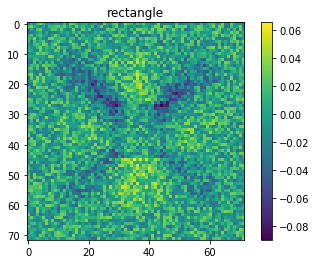

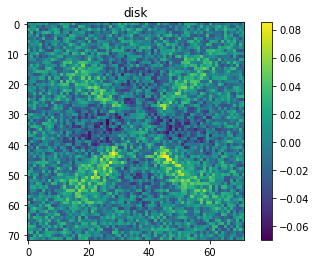

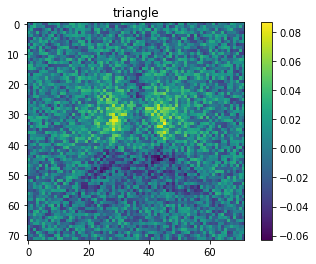

In [12]:
weights = model.get_weights()
cat = ["rectangle", "disk", "triangle"]

for i in range(weights[0].shape[1]):
    plt.imshow(weights[0][:, i].reshape(72, 72))
    plt.title(cat[i])
    plt.colorbar()
    plt.show()

#  A More Difficult Classification Problem
## Dataset generation

In [13]:
[X_train, Y_train] = generate_dataset_classification(600, 20, True)
Y_train_cat = to_categorical(Y_train)
[X_test, Y_test_cat] = generate_test_set_classification()

## Testing the linear model 

In [7]:
X_train.shape, Y_train_cat.shape

((600, 5184), (600, 3))

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.losses import *
from keras.activations import softmax
from keras.optimizers import SGD, Adam


nb_neurons = 10

model = Sequential([
    Dense(3, input_shape=(5184,)),
    Activation(softmax)
])

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam()

model.compile(loss=categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

In [19]:
model.fit(X_train, Y_train_cat, epochs=100, batch_size=32, verbose=0)
eval_train = model.evaluate(X_train, Y_train_cat)
eval_test = model.evaluate(X_test, Y_test_cat)

print("\nEvaluation training set: loss, accuracy", eval_train)
print("\nEvaluation test set: loss, accuracy", eval_test)

300/300 [==============================] - 0s 66us/step

Evaluation training set: loss, accuracy [0.5294278852144877, 0.7316666670640309]

Evaluation test set: loss, accuracy [1.0005389300982157, 0.5966666658719381]


The linear model loss reaches **0.52**, and an accuracy of 73% on the train set.
However, it **generalizes poorly** as the test set loss is 1.0 and accuracy drops to 59%.

## Convolutional model

In [21]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)

In [22]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.activations import relu

model = Sequential([
    Conv2D(16, (5,5), input_shape=(72,72,1), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32, (5,5)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(3, input_shape=(32*14*14,)),
    Activation(softmax)
])

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam()

model.compile(loss=categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train_cat, epochs=20, batch_size=32, verbose=0)

eval_train = model.evaluate(X_train, Y_train_cat, verbose=0, batch_size=32)
eval_test = model.evaluate(X_test, Y_test_cat, verbose=0, batch_size=32)

print("\nTrain:  loss {:3f}  accuracy {:.3f}".format(*eval_train))
print("Test :  loss {:.3f}  accuracy {:.3f}".format(*eval_test))


Train:  loss 0.060972  accuracy 0.983
Test :  loss 0.376  accuracy 0.873


The final loss of the convolutional model is 0.06, with an accuracy of 98%. This model fits much better the train data than the linear model. 
It also generalizes much better, as the final loss on the test set is 0.376, with an accuracy of 87%.

# A regression problem

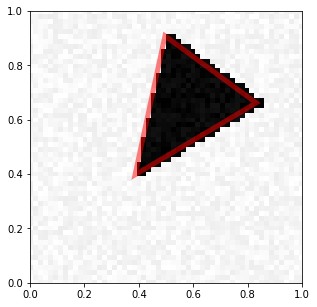

array([0.83182574, 0.66184073, 0.38625057, 0.39745326, 0.49634819,
       0.90833598])

In [24]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)

visualize_prediction(X_train[0], Y_train[0], imsize=72)
Y_train[0]

### A convolutional model

First, we attempt to use a network model with 3 convolutional layers having relatively small kernels (size 5), followed by 2 dense layers yielding a 6 dimensional output. No normalization is performed yet, this will serve as baseline.

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.activations import relu

model = Sequential([
    Conv2D(16, (5,5), input_shape=(72,72,1), activation='relu'),
    MaxPooling2D((2,2)), # output: 34x34
    Conv2D(32, (5,5), activation='relu'),
    MaxPooling2D((2,2)), # output 14x14
    Conv2D(32, (5,5), activation='relu'),
    MaxPooling2D((2,2)), # output 5x5
    Flatten(),
    Dense(40, input_shape=(32*5*5,)),
    Activation(relu),
    Dense(20),
    Activation(relu),
    Dense(6)
])

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam()

model.compile(loss=mean_absolute_error, optimizer=adam, metrics=['accuracy'])

In [26]:
model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1)

eval_train = model.evaluate(X_train, Y_train, verbose=0, batch_size=32)
eval_test = model.evaluate(X_test, Y_test, verbose=0, batch_size=32)

print("\nTrain:  loss {:f}  accuracy {:.3f}".format(*eval_train))
print("Test :  loss {:.2f}  accuracy {:.3f}".format(*eval_test))

Epoch 1/100
300/300 [==============================] - 2s 7ms/step - loss: 0.4427 - acc: 0.2033
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2760 - acc: 0.1967
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2545 - acc: 0.1633
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2442 - acc: 0.1900
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2350 - acc: 0.2000
Epoch 6/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2281 - acc: 0.2067
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2212 - acc: 0.2567
Epoch 8/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2148 - acc: 0.2567
Epoch 9/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2093 - acc: 0.3167
Epoch 10/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2054 - acc: 0.3167
Epoch 11/100
300/300 [=================

300/300 [==============================] - 1s 2ms/step - loss: 0.0627 - acc: 0.7567
Epoch 86/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0632 - acc: 0.7267
Epoch 87/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0626 - acc: 0.7067
Epoch 88/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0595 - acc: 0.7333
Epoch 89/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0593 - acc: 0.7500
Epoch 90/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0595 - acc: 0.7500
Epoch 91/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0586 - acc: 0.7867
Epoch 92/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0613 - acc: 0.7267
Epoch 93/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0628 - acc: 0.7233
Epoch 94/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0591 - acc: 0.7533
Epoch 95/100
300/300 [=====================

Final statistics are rather poor:
- on train set, final loss is 0.05, and final accuracy is 0.78. These results seem quantatively good. Plotting predictions reveals that prediction generally finds the vertices of the triangle but doesn't converge completely towards the vertex coordinate.
- on test set, final loss is 0.23, and final accuracy 0.26. This shows either that overfitting happenend during training, while not yielding satisfying results on the training set, or that the model generalizes very poorly, and some improvement has to be done on the model or dataset side.

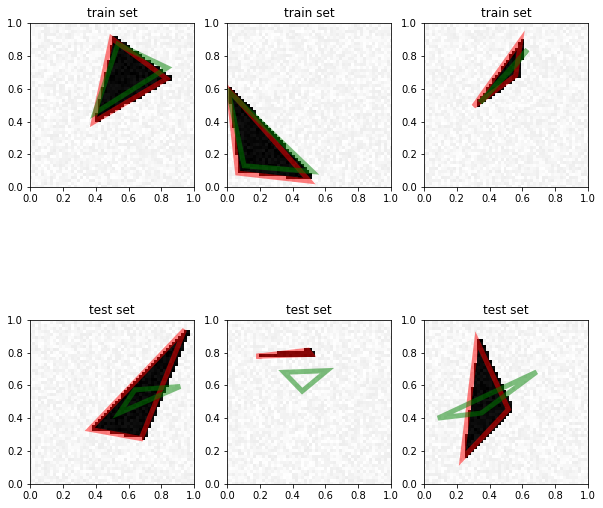

In [27]:
X, Y = X_train, Y_train
Ypred = model.predict(X_train)

fig, axarr = plt.subplots(2, 3, figsize=(10, 10))
title = "train set"

for i in range(2):
    for j in range(3):
        x, y = X[j], Y[j]
        ypred = Ypred[j]
        
        ax = axarr[i, j]
        I = x.reshape((72, 72))
        ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
        ax.set_xlim([0,1]); ax.set_ylim([0,1])

        xy = y.reshape(3,2)
        tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
        ax.add_patch(tri)
        xy = ypred.reshape(3,2)
        tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'g', linewidth = 5, alpha = 0.5)
        ax.add_patch(tri)
        
        ax.title.set_text(title)
    
    X, Y = X_test, Y_test
    Ypred = model.predict(X_test)
    title = "test set"


plt.show()

### Normalizing input

It can be observed that in the array of coordinates, the points are not given in a seemingly consistent way. A way to enforce normalization is to sort the 3 points coordinates by ascending order of the absciss coordinate.

In [28]:
def norm_Y(Y):
    Ynorm = np.zeros(Y.shape)
    for indRow in range(Y.shape[0]):
        indsort = Y[indRow, [0, 2, 4]].argsort()

        for i in range(3):
            Ynorm[indRow, [2*i, 2*i+1]] = Y[indRow, [2*indsort[i], 2*indsort[i]+1]]
    return Ynorm

Y_train_norm = norm_Y(Y_train)
Y_test_norm = norm_Y(Y_test)

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.activations import relu

model = Sequential([
    Conv2D(16, (5,5), input_shape=(72,72,1), activation='relu'),
    MaxPooling2D((2,2)), # output: 34x34
    Conv2D(32, (5,5)),
    MaxPooling2D((2,2)), # output 14x14
    Conv2D(32, (5,5)),
    MaxPooling2D((2,2)), # output 5x5
    Flatten(),
    Dense(40, input_shape=(32*5*5,)),
    Activation(relu),
    Dense(20),
    Activation(relu),
    Dense(6)
])

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam()

model.compile(loss=mean_absolute_error, optimizer=adam, metrics=['accuracy'])

In [30]:
model.fit(X_train, Y_train_norm, epochs=100, batch_size=64, verbose=1)

eval_train = model.evaluate(X_train, Y_train_norm, verbose=0, batch_size=32)
eval_test = model.evaluate(X_test, Y_test_norm, verbose=0, batch_size=32)

print("\nTrain:  loss {:f}  accuracy {:.3f}".format(*eval_train))
print("Test :  loss {:.2f}  accuracy {:.3f}".format(*eval_test))

Epoch 1/100
300/300 [==============================] - 2s 6ms/step - loss: 0.4343 - acc: 0.0000e+00
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3417 - acc: 0.0000e+00
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2845 - acc: 0.0000e+00
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2216 - acc: 0.4767
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2090 - acc: 0.5433
Epoch 6/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1944 - acc: 0.5367
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1810 - acc: 0.5500
Epoch 8/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1720 - acc: 0.5800
Epoch 9/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1648 - acc: 0.5900
Epoch 10/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1582 - acc: 0.5933
Epoch 11/100
300/300 [=====

300/300 [==============================] - 1s 2ms/step - loss: 0.0436 - acc: 0.8800
Epoch 86/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0406 - acc: 0.8833
Epoch 87/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0410 - acc: 0.8633
Epoch 88/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0390 - acc: 0.8767
Epoch 89/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0413 - acc: 0.8867
Epoch 90/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0390 - acc: 0.9033
Epoch 91/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0375 - acc: 0.9100
Epoch 92/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0361 - acc: 0.8833
Epoch 93/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0361 - acc: 0.8933
Epoch 94/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0348 - acc: 0.8900
Epoch 95/100
300/300 [=====================

This simple normalization does not allow to improve the network loss or accuracy on the training set much (0.05 to 0.035 in loss, 0.78 to 0.91), but improves largely the performance on the test set: loss reduces from 0.23 to 0.12, accuracy from goes from 0.26 up to 0.70.

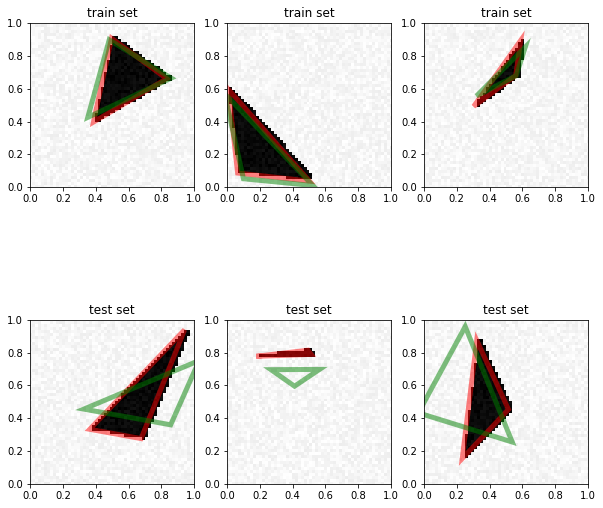

In [31]:
X, Y = X_train, Y_train_norm
Ypred = model.predict(X_train)

fig, axarr = plt.subplots(2, 3, figsize=(10, 10))
title = "train set"

for i in range(2):
    for j in range(3):
        x, y = X[j], Y[j]
        ypred = Ypred[j]
        
        ax = axarr[i, j]
        I = x.reshape((72, 72))
        ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
        ax.set_xlim([0,1]); ax.set_ylim([0,1])

        xy = y.reshape(3,2)
        tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
        ax.add_patch(tri)
        xy = ypred.reshape(3,2)
        tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'g', linewidth = 5, alpha = 0.5)
        ax.add_patch(tri)
        
        ax.title.set_text(title)
    
    X, Y = X_test, Y_test_norm
    Ypred = model.predict(X_test)
    title = "test set"


plt.show()

# Image denoising

In [35]:
from mp1 import generate_dataset_denoising

[X_train, Y_train] = generate_dataset_denoising(nb_samples=128, noise=20, free_location=True)
[X_test, Y_test] = generate_dataset_denoising(nb_samples=128, noise=20, free_location=True)

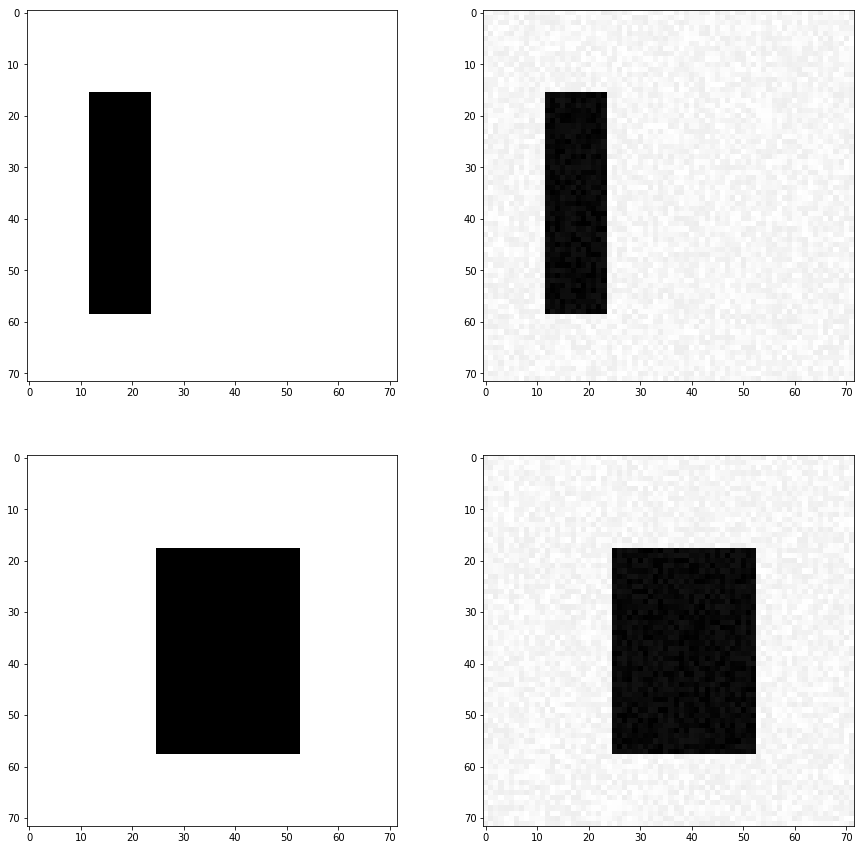

In [42]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 72, 72, 1)

X_test = X_test.reshape(X_test.shape[0], 72, 72, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 72, 72, 1)

nrows = 2
X_train.shape, X_train.shape

fig, axs = plt.subplots(figsize=(15,15), nrows=nrows, ncols=2)
for i in range(nrows):
    im_noised = X_train[i+1, :, :, 0]
    im = Y_train[i+1, :, :, 0]
    
    axs[i, 0].imshow(im, cmap='gray')
    axs[i, 1].imshow(im_noised, cmap='gray')

plt.show()

In [38]:
from keras.layers import Input, Dropout, UpSampling2D, concatenate, Conv2D, MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam

input_size = X_train[0].shape

inputs = Input(input_size)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same')(inputs)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same')(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same')(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same')(pool3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same')(conv4)
drop4 = Dropout(0.5)(conv4)
# pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

# conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same')(pool4)
# conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same')(conv5)
# #drop5 = Dropout(0.5)(conv5)

# upsampling = UpSampling2D(size = (2,2))(drop5)

# up6 = Conv2D(512, 2, activation = 'relu', padding = 'same')(upsampling)
# merge6 = concatenate([drop4,up6], axis = 3)
# conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same')(merge6)
# conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same')(conv6)

upsampling = UpSampling2D(size= (2,2))(drop4)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same')(upsampling) #UpSampling2D(size = (2,2))(conv6)
# merge7 = concatenate([conv3,up7], axis = 3)
merge7 = up7
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same')(conv7)

up8 = UpSampling2D(size= (2,2))(conv7)
up_conv8 = Conv2D(128, 2, activation = 'relu', padding = 'same')(up8)
merge8 = concatenate([conv2, up_conv8], axis = -1)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same')(conv8)

up9 = UpSampling2D(size = (2,2))(conv8)
up_conv9 = Conv2D(64, 2, activation = 'relu', padding = 'same')(up9)
merge9 = concatenate([conv1, up_conv9], axis = -1)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same')(conv9)

conv10 = Conv2D(1, 1, activation = 'relu', padding = 'same')(conv9)
# conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

model = Model(inputs = inputs, outputs = conv10)

model.compile(optimizer = Adam(lr=1e-4), loss = 'mean_squared_error')

#model.summary()

In [39]:
model.fit(X_train, Y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
128/128 [==============================] - 16s 124ms/step - loss: 54638.6055
Epoch 2/50
128/128 [==============================] - 12s 93ms/step - loss: 48817.6211
Epoch 3/50
128/128 [==============================] - 12s 95ms/step - loss: 41182.5547
Epoch 4/50
128/128 [==============================] - 12s 94ms/step - loss: 29076.2119
Epoch 5/50
128/128 [==============================] - 12s 95ms/step - loss: 11674.6990
Epoch 6/50
128/128 [==============================] - 12s 95ms/step - loss: 19248.4458
Epoch 7/50
128/128 [==============================] - 13s 98ms/step - loss: 6335.5974
Epoch 8/50
128/128 [==============================] - 12s 97ms/step - loss: 8379.4492
Epoch 9/50
128/128 [==============================] - 12s 97ms/step - loss: 7901.9229
Epoch 10/50
128/128 [==============================] - 12s 97ms/step - loss: 5496.3975
Epoch 11/50
128/128 [==============================] - 13s 100ms/step - loss: 3481.4707
Epoch 12/50
128/128 [=======================

In [40]:
eval_train = model.evaluate(X_train, Y_train, verbose=0, batch_size=32)
eval_test = model.evaluate(X_test, Y_test, verbose=0, batch_size=32)

print("\nTrain:  loss {:f}".format(eval_train))
print("Test :  loss {:.2f}".format(eval_test))


Train:  loss 196.856133
Test :  loss 194.39


The optimization allows to reduce highly the objective, however the results are not qualitatively satisfying: while the white and black areas are globally smoothed, there remains a large offset in what should be the black area. Besides, the shape of the rectangle is quite smoothed.

It can be noted though that the network performs equivalently over the train and test set.

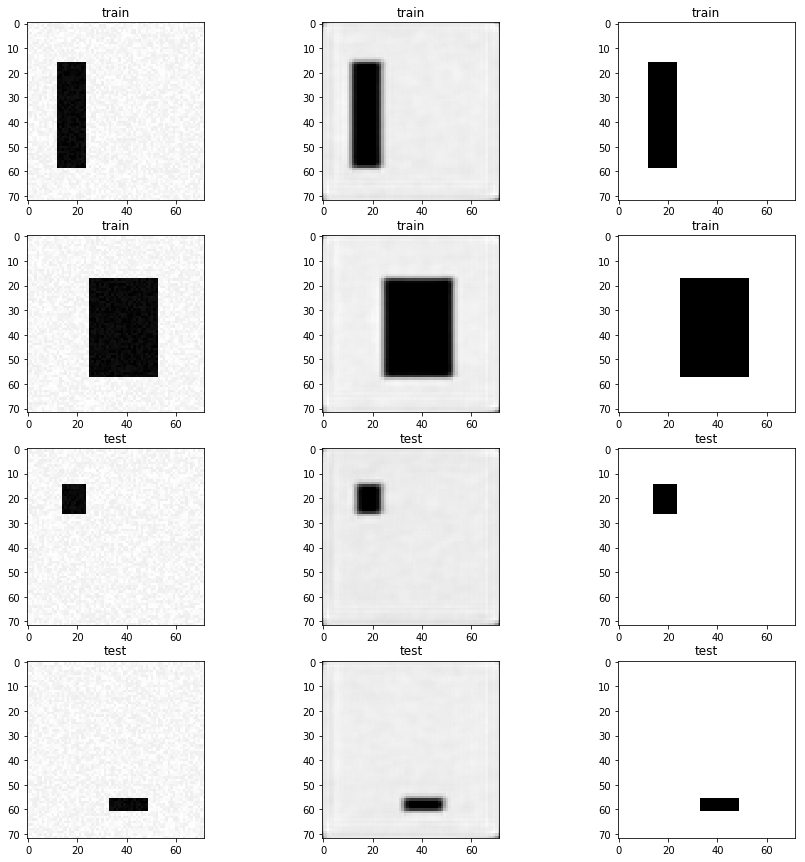

In [49]:
nrows = 2

fig, axs = plt.subplots(figsize=(15,15), nrows=nrows*2, ncols=3)

im_preds = model.predict(X_train[1:nrows+1])
im_preds_val = model.predict(X_test[:nrows])

for i in range(nrows):
    im_noised = X_train[i+1, :, :, 0]
    im_true = Y_train[i+1, :, :, 0]
    im_pred = im_preds[i, :, :, 0]
    
    axs[i, 0].imshow(im_noised, cmap='gray')
    axs[i, 0].title.set_text("train")
    axs[i, 1].imshow(im_pred, cmap='gray')
    axs[i, 1].title.set_text("train")
    axs[i, 2].imshow(im_true, cmap='gray')
    axs[i, 2].title.set_text("train")
    
for i in range(nrows):
    im_noised = X_test[i, :, :, 0]
    im_true = Y_test[i, :, :, 0]
    im_pred = im_preds_val[i, :, :, 0]
    
    axs[i+nrows, 0].imshow(im_noised, cmap='gray')
    axs[i+nrows, 0].title.set_text("test")
    axs[i+nrows, 1].imshow(im_pred, cmap='gray')
    axs[i+nrows, 1].title.set_text("test")
    axs[i+nrows, 2].imshow(im_true, cmap='gray')
    axs[i+nrows, 2].title.set_text("test")

plt.show()